In [2]:
import pandas as pd
data=pd.read_csv('spgclasstry.csv')

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(data),index=data.index,columns=data.columns)
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder=preprocessing.LabelEncoder()
df1['Classification']=label_encoder.fit_transform(df1['Classification'])

In [5]:
x=df1.drop('Classification',axis=1)
y=df1['Classification']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

In [7]:
knn = KNeighborsClassifier(n_neighbors=8)

In [8]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [9]:
print(knn.score(x_test, y_test))

0.6595492289442467


In [10]:
import numpy as np
import matplotlib.pyplot as plt

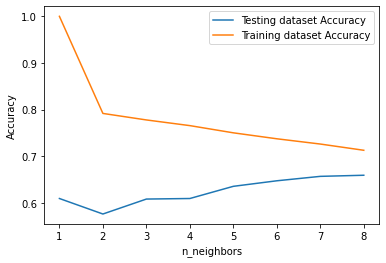

In [11]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()